In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("kyphosis.csv")

In [3]:
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


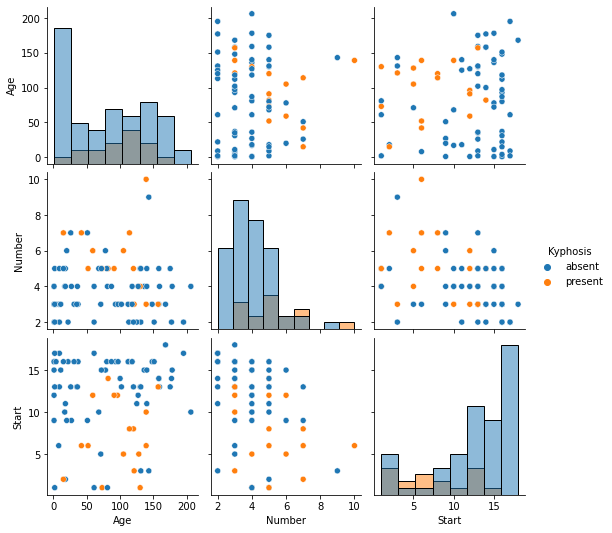

In [5]:
sns.pairplot(data,hue = "Kyphosis",diag_kind="hist")

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = data.drop("Kyphosis",axis = 1)
y = data["Kyphosis"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dTree = DecisionTreeClassifier()

In [27]:
dTree.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
predictions = dTree.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix,classification_report

In [32]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[17  3]
 [ 2  3]]
              precision    recall  f1-score   support

      absent       0.89      0.85      0.87        20
     present       0.50      0.60      0.55         5

    accuracy                           0.80        25
   macro avg       0.70      0.72      0.71        25
weighted avg       0.82      0.80      0.81        25



In [33]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rfc = RandomForestClassifier(n_estimators=200)

In [36]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [38]:
rfc_pred = rfc.predict(X_test)

In [40]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[19  1]
 [ 2  3]]
              precision    recall  f1-score   support

      absent       0.90      0.95      0.93        20
     present       0.75      0.60      0.67         5

    accuracy                           0.88        25
   macro avg       0.83      0.77      0.80        25
weighted avg       0.87      0.88      0.87        25



In [42]:
data["Kyphosis"].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64